In [1]:
#Data Processing
import pandas as pd

#linear algebra
import numpy as np

#dat visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

#algorithms
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
sales_df = pd.read_csv('Advertising.csv')

In [4]:
sales_df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
#number of columns and rows
sales_df.shape

(200, 5)

In [6]:
#getting information about the data

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#check the number of missing values in each column 

sales_df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [10]:
#checking for null values
sales_df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


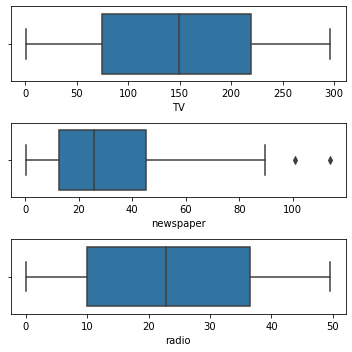

In [11]:
#outlier Analysis
fig, axis = plt.subplots(3, figsize =(5,5))
plt1 = sns.boxplot(sales_df['TV'], ax =axis[0])
plt2 = sns.boxplot(sales_df['newspaper'], ax= axis[1])
plt3 = sns.boxplot(sales_df['radio'], ax =axis[2])
plt.tight_layout()

There is no considerable outliers present in the data

# Exploratory Data Analysis

# Univariate Analysis

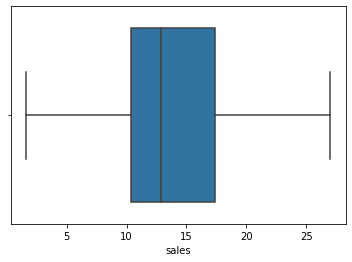

In [12]:
#Sales[Target variable]

sns.boxplot(sales_df['sales'])
plt.show()

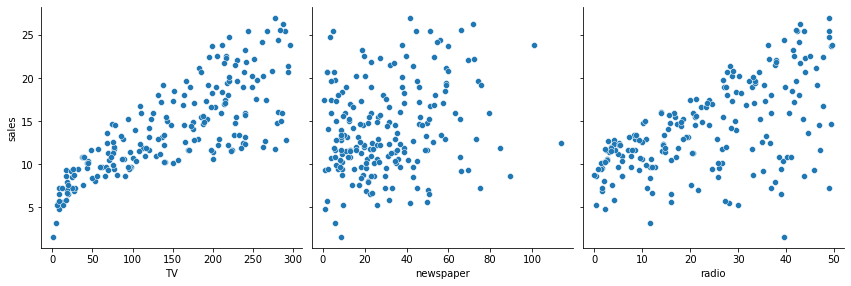

In [15]:
#let us see how sales are related with variables using scatter plot

sns.pairplot(sales_df, x_vars =['TV','newspaper','radio'], y_vars ='sales', height=4, aspect=1 , kind='scatter')
plt.show()

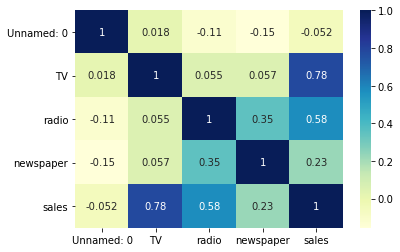

In [18]:
# let us see correlation between different variables

sns.heatmap(sales_df.corr(), cmap ="YlGnBu", annot=True)
plt.show()

As is visible from the pairplot and the heatmap , the varibale TV seems to be the most correlated with Sales.  lets go ahead and perform simple linear regression using TV as our feature variable

# Model  Building

#simple linear regression

we first assign the feature variable, TV , in this case to the varibale X, and the response variable as Sales to Y

In [20]:
X = sales_df['TV']
Y = sales_df['sales']

Train_Test split
need to split the varibles into training and testing sets

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [23]:
#lets now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [24]:
Y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [25]:
import statsmodels.api as sm

In [26]:
#Add a constant to get an intercept

X_train_sm=sm.add_constant(X_train)

In [27]:
#fit the regression line using 'OLS'
lr =sm.OLS(Y_train, X_train_sm).fit()

In [28]:
#print the parameters, 
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [29]:
#performing a summary operation lists out all the different parameters of the regression line fitted 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Thu, 05 May 2022   Prob (F-statistic):           2.84e-30
Time:                        21:24:32   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

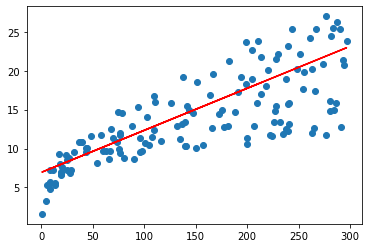

In [37]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Model Evaluation

In [31]:
y_train_pred = lr.predict(X_train_sm)
res =(Y_train - y_train_pred)

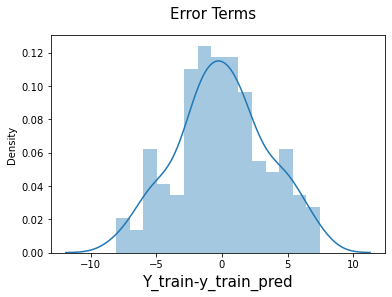

In [32]:
fig = plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Y_train-y_train_pred', fontsize=15)
plt.show()

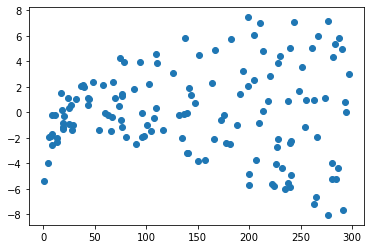

In [33]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

# Predictions on the test set

In [34]:
#Add the constant to X_test

X_test_sm = sm.add_constant(X_test)

In [35]:
#predict the y values corresponding the X_test_sm

y_pred = lr.predict(X_test_sm)

In [36]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [40]:
#looking at the RMSE
#returns the mean squared error: we will take a square root
np.sqrt(mean_squared_error(Y_test, y_pred))

2.8241456288327016

In [41]:
#checking the R-squared on the test set

r_squared = r2_score(Y_test, y_pred)
r_squared

0.5942987267783297

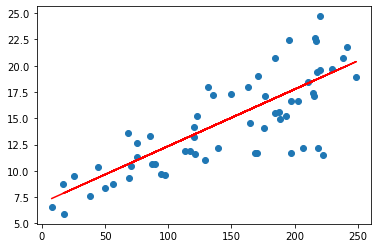

In [44]:
#visualizing the fit on the test set
plt.scatter(X_test,Y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()